In [136]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [137]:
DIR = '/names'

In [138]:
def qual_change(names, start_year, end_year, inc):
    rate = {}
    for name in names:
        rate[name] = []
    for year in range(start_year, end_year, inc):
        path = 'names/yob'+str(year)+'.txt'
        names_list = pd.read_csv(
            path,
            names=['Name', 'Gender', 'Count']
        )
        for name in names:
            rate[name].append(names_list[names_list['Name']==name].Count.sum())
    rate = pd.DataFrame.from_dict(rate)
    rate.plot()

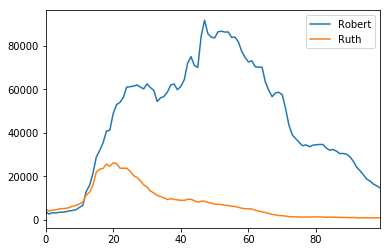

In [139]:
qual_change(['Ruth', 'Robert'],1900,2000, 1)

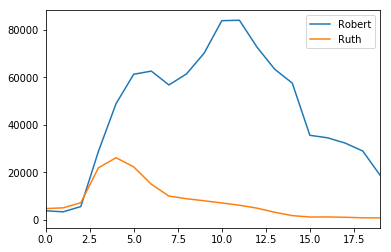

In [140]:
qual_change(['Ruth', 'Robert'],1900,2000, 5)

In [252]:
def first_char_top_10(char, year):
    path = 'names/yob'+str(year)+'.txt'
    names = pd.read_csv(
        path,
        names=['Name', 'Gender', 'Count']
    )
    def filt(row):
        if(row.Name[0]!='R'):
            row.Name = 'nomatter'
        return row
    names = names.apply(filt, axis=1)
    names = names[names.Name!='nomatter']
    names = names.sort_values(by='Count', ascending=False)
    (names
     .groupby('Name')
     .sum()
     .sort_values(by='Count', ascending=False)
     .head(10)
    ).plot.pie(y='Count')

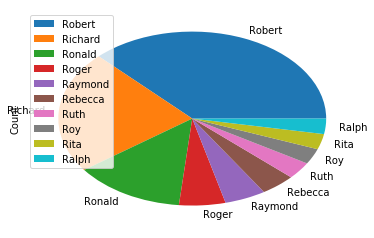

In [253]:
first_char_top_10('R', 1950)

In [364]:
def dot_chart(start_year, end_year):
    def num_of_consonants(row):
        consonants = 0
        name = row.Name
        for letter in name:
            letter = letter.lower()
            if letter == "a" or letter == "e" or\
            letter == "i" or letter == "o" or\
            letter == "u" or letter == "y":
                pass
            else:
                consonants += 1
        return consonants
    for year in range(start_year, end_year):
        path = 'names/yob'+str(year)+'.txt'
        names = pd.read_csv(
            path,
            names=['Name', 'Gender', 'Count']
        )
        if(year == 1900):
            all_names = names
        else:
            all_names = pd.merge(
                all_names, names,
                on=['Name', 'Gender'],
                suffixes=['_Prev', '_Post']
            )
            all_names['Count'] = all_names['Count_Prev'] + all_names['Count_Post']
            del all_names['Count_Prev']
            del all_names['Count_Post'] 
    all_names['Consonants'] = names.apply(num_of_consonants, axis=1)
    all_names.plot.scatter(x='Consonants', y='Count')

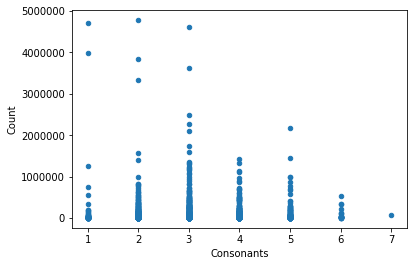

In [365]:
dot_chart(1900,2000)